In [5]:
#loading in relevant packages
import pandas as pd 
import pandas as pd              
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import folium   
import seaborn as sns 

In [6]:
#making sure that I'm working with the right file path
import os
os.chdir(os.path.dirname(r"C:\Users\caree\uep239-finalproject"))
print("Path changed to: "+os.getcwd())

Path changed to: C:\Users\caree


In [7]:
#loading in csv data (age and sex info for population) do this for each of them
age = pd.read_csv(r"C:\Users\caree\uep239-finalproject\Data\ACSST5Y2019.S0101\ACSST5Y2019.S0101\ACSST5Y2019.S0101_data_with_overlays.csv")
age_col = age.columns

age = pd.read_csv(r"C:\Users\caree\uep239-finalproject\Data\ACSST5Y2019.S0101\ACSST5Y2019.S0101\ACSST5Y2019.S0101_data_with_overlays.csv", names=age_col, skiprows=2)
age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Columns: 458 entries, GEO_ID to S0101_C06_038M
dtypes: int64(186), object(272)
memory usage: 1.9+ MB


In [8]:
age.head()

,GEO_ID,NAME,S0101_C01_001E,S0101_C01_001M,S0101_C01_002E,S0101_C01_002M,S0101_C01_003E,S0101_C01_003M,S0101_C01_004E,S0101_C01_004M,...,S0101_C06_034E,S0101_C06_034M,S0101_C06_035E,S0101_C06_035M,S0101_C06_036E,S0101_C06_036M,S0101_C06_037E,S0101_C06_037M,S0101_C06_038E,S0101_C06_038M
0,8600000US01001,ZCTA5 01001,17312,735,956,233,863,222,967,274,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
1,8600000US01002,ZCTA5 01002,30014,485,872,143,1043,192,1123,215,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
2,8600000US01003,ZCTA5 01003,11357,477,0,19,0,19,0,19,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
3,8600000US01005,ZCTA5 01005,5128,404,127,72,199,139,408,153,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
4,8600000US01007,ZCTA5 01007,15005,20,879,183,828,186,969,193,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)


In [9]:
age_pd = pd.DataFrame(age)

#Renaming columns to make them more understandable
age_pd.rename(columns = {'S0101_C01_015E' : '65-69 Years', 'S0101_C01_001E': 'Total Population', 'S0101_C01_016E': '70-74 Years', 'S0101_C01_017E': '75-79 Years', 'S0101_C01_018E': '80-84 Years', 'S0101_C01_019E' : '85 Years and Older', 'NAME':'ZCTA'}, inplace = True)

#Remove ZCTA5 from column values so it will match when they merge
age_pd['ZCTA'] = age_pd['ZCTA'].map(lambda x: x.lstrip('ZCTA5'))

#choosing out the columns that are going to be analysed
age = age_pd[['ZCTA', 'Total Population', '65-69 Years', '70-74 Years', '75-79 Years',  '80-84 Years', '85 Years and Older' ]]
age.head

<bound method NDFrame.head of        ZCTA  Total Population  65-69 Years  70-74 Years  75-79 Years  \
0     01001             17312         1016         1057          786   
1     01002             30014         1172         1219          599   
2     01003             11357            4            0            0   
3     01005              5128          375          167           68   
4     01007             15005          880          489          423   
..      ...               ...          ...          ...          ...   
532   02777             16567         1256          744          468   
533   02779              6730          377          370          160   
534   02780             50438         2201         2141         1175   
535   02790             15793         1284          996          690   
536   02791               402           47           69           17   

     80-84 Years  85 Years and Older  
0            435                 768  
1            441           

In [10]:
#do for each if see (x)
#import numpy as np 
#age = age.replace('(X)', np.NaN) # could come back and change to '' if needed

In [11]:
print(type(age))
age.head()

<class 'pandas.core.frame.DataFrame'>


,ZCTA,Total Population,65-69 Years,70-74 Years,75-79 Years,80-84 Years,85 Years and Older
0,01001,17312,1016,1057,786,435,768
1,01002,30014,1172,1219,599,441,580
2,01003,11357,4,0,0,0,0
3,01005,5128,375,167,68,81,102
4,01007,15005,880,489,423,310,119


In [12]:
age.dtypes

ZCTA                  object
Total Population       int64
65-69 Years            int64
70-74 Years            int64
75-79 Years            int64
80-84 Years            int64
85 Years and Older     int64
dtype: object

In [13]:
#trying to change age to numeric so I can perform calculations
#age = age['Total Population', '65-69 Years', '70-74 Years', '75-79 Years'] = pd.to_numeric(age['Total Population', '65-69 Years', '70-74 Years', '75-79 Years'], errors = 'coerce')
#age

In [14]:
#add up all the senior ages and divide by total pop for each zip code
#age.count(axis='rows')

#age['seniors'] = (age['65-69 Years'].count() + age['70-74 Years'].count() + age['75-79 Years'].count() + age['80-84 Years'].count() + age['85 Years and Older'].count())

In [15]:
age['seniors'] = (age['65-69 Years'] + age['70-74 Years'] + age['75-79 Years'] + age['80-84 Years'] + age['85 Years and Older'])

<ipython-input-15-3c4ee48d2a96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age['seniors'] = (age['65-69 Years'] + age['70-74 Years'] + age['75-79 Years'] + age['80-84 Years'] + age['85 Years and Older'])


In [16]:
age['seniors'].unique()

array([ 4062,  4011,     4,   793,  2221,   285,    35,   736,   278,
         148,  3342,  6276,   556,   228,  3382,  3528,   104,  2070,
         206,    84,  1183,   421,  1261,  1289,   128,   646,   248,
        5698,   425,   446,   518,  3977,  1650,  2526,  2154,     0,
          31,   303,  1612,   190,   223,   277,  1197,    25,  3422,
        2108,   266,   314,  2164,   386,    54,  7293,    47,  4560,
         136,    93,   163,  3153,   528,     3,   315,   250,  3390,
        1342,  3306,  1141,  2808,  3134,  2330,  2067,   636,  1251,
        1021,  9083,  1592,   176,   580,   690,  1466,    39,  2137,
         524,   280,   633,  1507,  1860,    65,    67,    57,  3010,
         281,   331,   231,   141,   621,   108,   184,    69,   398,
        1543,   170,  3740,   316,  2249,   550,    34,   390,   450,
         459,   238,    12,   267,   151,    28,   208,    18,   312,
         219,   591,  1417,   302,   137,   311,   963,   572,  1111,
         156,  5487,

In [17]:
age.shape[0]

537

In [19]:
#divide age by total population  (inclass vector activity)
age['percent_seniors'] =  (age.seniors) / (age['Total Population'])


<ipython-input-19-8e9121531bb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age['percent_seniors'] =  (age.seniors) / (age['Total Population'])


In [20]:
age['percent_seniors']

0      0.234635
1      0.133638
2      0.000352
3      0.154641
4      0.148017
         ...   
532    0.200821
533    0.140267
534    0.153079
535    0.242956
536    0.537313
Name: percent_seniors, Length: 537, dtype: float64

In [21]:
#loading in csv data (level of educational attainment)
foreign = pd.read_csv(r"C:\Users\caree\uep239-finalproject\Data\ACSST5Y2019.S0501_2021-05-12T161803\ACSST5Y2019.S0501_data_with_overlays_2021-05-12T161735.csv")
for_col = foreign.columns
foreign = pd.read_csv(r"C:\Users\caree\uep239-finalproject\Data\ACSST5Y2019.S0501_2021-05-12T161803\ACSST5Y2019.S0501_data_with_overlays_2021-05-12T161735.csv",names=for_col, skiprows=2)
foreign.info()


C:\Users\caree\miniconda3\envs\uep239\lib\site-packages\IPython\core\interactiveshell.py:3050: DtypeWarning: Columns (2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,24

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Columns: 1372 entries, GEO_ID to S0501_C05_137M
dtypes: float64(1337), object(35)
memory usage: 5.6+ MB


In [22]:
foreign.head()

,GEO_ID,NAME,S0501_C01_001E,S0501_C01_001M,S0501_C01_002E,S0501_C01_002M,S0501_C01_003E,S0501_C01_003M,S0501_C01_004E,S0501_C01_004M,...,S0501_C05_133E,S0501_C05_133M,S0501_C05_134E,S0501_C05_134M,S0501_C05_135E,S0501_C05_135M,S0501_C05_136E,S0501_C05_136M,S0501_C05_137E,S0501_C05_137M
0,8600000US01001,ZCTA5 01001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8600000US01002,ZCTA5 01002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8600000US01003,ZCTA5 01003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8600000US01005,ZCTA5 01005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8600000US01007,ZCTA5 01007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
for_pd = pd.DataFrame(foreign)

#Renaming columns to make them more understandable
for_pd.rename(columns = {'S0501_C03_001E' : 'Foreign-Born Total Pop', 'S0501_C01_001E': 'Total Population', 'NAME':'ZCTA'}, inplace = True)

#Remove ZCTA5 from column values so it will match when they merge
for_pd['ZCTA'] = for_pd['ZCTA'].map(lambda x: x.lstrip('ZCTA5'))

#choosing out the columns that are going to be analysed
foreign = for_pd[['ZCTA', 'Total Population','Foreign-Born Total Pop']]
foreign.head

<bound method NDFrame.head of               ZCTA  Total Population  Foreign-Born Total Pop
0            01001               NaN                     NaN
1            01002               NaN                     NaN
2            01003               NaN                     NaN
3            01005               NaN                     NaN
4            01007               NaN                     NaN
..             ...               ...                     ...
533          02779               NaN                     NaN
534          02780               NaN                     NaN
535          02790               NaN                     NaN
536          02791               NaN                     NaN
537  Massachusetts         6850553.0               1148909.0

[538 rows x 3 columns]>

In [24]:
print(type(foreign))
foreign.head()

<class 'pandas.core.frame.DataFrame'>


,ZCTA,Total Population,Foreign-Born Total Pop
0,01001,NaN,NaN
1,01002,NaN,NaN
2,01003,NaN,NaN
3,01005,NaN,NaN
4,01007,NaN,NaN


In [25]:
foreign.dtypes

ZCTA                       object
Total Population          float64
Foreign-Born Total Pop    float64
dtype: object

In [26]:
#divide age by total population  (inclass vector activity)
foreign['percent_foreign'] =  (foreign['Foreign-Born Total Pop']) / (foreign['Total Population'])

<ipython-input-26-d1e70b525e5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foreign['percent_foreign'] =  (foreign['Foreign-Born Total Pop']) / (foreign['Total Population'])


In [27]:
foreign['percent_foreign']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
533        NaN
534        NaN
535        NaN
536        NaN
537    0.16771
Name: percent_foreign, Length: 538, dtype: float64

In [28]:
foreign['percent_foreign'].unique()

array([       nan, 0.23785256, 0.24529339, 0.36272268, 0.27569458,
       0.20213583, 0.43352847, 0.33109351, 0.22302216, 0.3663234 ,
       0.24628504, 0.24812524, 0.40369856, 0.37819365, 0.15472752,
       0.26050537, 0.25634481, 0.34261746, 0.37565857, 0.2879486 ,
       0.38330416, 0.34199865, 0.47447263, 0.21441017, 0.28275081,
       0.36730798, 0.26720206, 0.32598756, 0.24444214, 0.29662921,
       0.35236955, 0.42642332, 0.43078624, 0.45354276, 0.38982514,
       0.21670712, 0.29989562, 0.37162435, 0.35406812, 0.21930752,
       0.35319726, 0.30429978, 0.29367904, 0.21555268, 0.16514015,
       0.1677104 ])

In [29]:
#loading in csv data(households that speak limited english)
limited_eng = pd.read_csv(r"C:\Users\caree\uep239-finalproject\Data\ACSST5Y2019.S1602_2021-05-12T065118\ACSST5Y2019.S1602_data_with_overlays_2021-05-12T065115.csv")
lim_eng_col = limited_eng.columns
limited_eng = pd.read_csv(r"C:\Users\caree\uep239-finalproject\Data\ACSST5Y2019.S1602_2021-05-12T065118\ACSST5Y2019.S1602_data_with_overlays_2021-05-12T065115.csv",names=lim_eng_col, skiprows=2)
limited_eng.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GEO_ID          538 non-null    object
 1   NAME            538 non-null    object
 2   S1602_C01_001E  538 non-null    int64 
 3   S1602_C01_001M  538 non-null    int64 
 4   S1602_C01_002E  538 non-null    int64 
 5   S1602_C01_002M  538 non-null    int64 
 6   S1602_C01_003E  538 non-null    int64 
 7   S1602_C01_003M  538 non-null    int64 
 8   S1602_C01_004E  538 non-null    int64 
 9   S1602_C01_004M  538 non-null    int64 
 10  S1602_C01_005E  538 non-null    int64 
 11  S1602_C01_005M  538 non-null    int64 
 12  S1602_C02_001E  538 non-null    object
 13  S1602_C02_001M  538 non-null    object
 14  S1602_C02_002E  538 non-null    object
 15  S1602_C02_002M  538 non-null    object
 16  S1602_C02_003E  538 non-null    object
 17  S1602_C02_003M  538 non-null    object
 18  S1602_C02_

In [30]:
limited_eng.head()

,GEO_ID,NAME,S1602_C01_001E,S1602_C01_001M,S1602_C01_002E,S1602_C01_002M,S1602_C01_003E,S1602_C01_003M,S1602_C01_004E,S1602_C01_004M,...,S1602_C04_001E,S1602_C04_001M,S1602_C04_002E,S1602_C04_002M,S1602_C04_003E,S1602_C04_003M,S1602_C04_004E,S1602_C04_004M,S1602_C04_005E,S1602_C04_005M
0,8600000US01001,ZCTA5 01001,7413,322,200,105,866,216,155,89,...,2.4,1.5,22.0,19.2,10.9,9.4,25.8,30.2,0.0,40.1
1,8600000US01002,ZCTA5 01002,9798,451,390,118,962,228,710,189,...,2.7,1.1,10.8,9.4,5.0,5.4,23.2,10.8,3.8,7.5
2,8600000US01003,ZCTA5 01003,42,42,0,19,4,7,14,20,...,0.0,47.5,-,**,0.0,100.0,0.0,82.3,-,**
3,8600000US01005,ZCTA5 01005,1944,232,19,30,47,47,25,42,...,0.0,1.8,0.0,70.6,0.0,44.9,0.0,61.6,-,**
4,8600000US01007,ZCTA5 01007,5563,196,103,66,279,114,181,110,...,1.9,1.7,15.5,25.7,6.5,10.0,38.1,34.8,-,**


In [31]:
limited_pd = pd.DataFrame(limited_eng)

#Renaming columns to make them more understandable
limited_pd.rename(columns = {'S1602_C01_001E' : 'Total Households', 'S1602_C03_001E': 'Limited English-Speaking', 'NAME':'ZCTA'}, inplace = True)

#Remove ZCTA5 from column values so it will match when they merge
limited_pd['ZCTA'] = limited_pd['ZCTA'].map(lambda x: x.lstrip('ZCTA5'))

#choosing out the columns that are going to be analysed
limited_eng = limited_pd[['ZCTA', 'Total Households','Limited English-Speaking']]
limited_eng.head

<bound method NDFrame.head of               ZCTA  Total Households  Limited English-Speaking
0            01001              7413                       178
1            01002              9798                       266
2            01003                42                         0
3            01005              1944                         0
4            01007              5563                       103
..             ...               ...                       ...
533          02779              2384                        17
534          02780             19910                      1256
535          02790              6388                        97
536          02791               234                         0
537  Massachusetts           2617497                    152845

[538 rows x 3 columns]>

In [32]:
print(type(limited_eng))

<class 'pandas.core.frame.DataFrame'>


In [33]:
limited_eng.dtypes

ZCTA                        object
Total Households             int64
Limited English-Speaking     int64
dtype: object

In [34]:
#divide age by total population  (inclass vector activity)
limited_eng['percent_limited'] = (limited_eng['Limited English-Speaking']) / (limited_eng['Total Households'])

<ipython-input-34-8808438e5002>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  limited_eng['percent_limited'] = (limited_eng['Limited English-Speaking']) / (limited_eng['Total Households'])


In [44]:
limited_eng['percent_limited']

0      0.024012
1      0.027148
2      0.000000
3      0.000000
4      0.018515
         ...   
533    0.007131
534    0.063084
535    0.015185
536    0.000000
537    0.058394
Name: percent_limited, Length: 538, dtype: float64

In [35]:
#loading in csv data (financial charachteristics of population)
financial = pd.read_csv(r"C:\Users\caree\uep239-finalproject\Data\ACSST5Y2019.S2503\ACSST5Y2019.S2503\ACSST5Y2019.S2503_data_with_overlays.csv")
fin_col = financial.columns
financial = pd.read_csv(r"C:\Users\caree\uep239-finalproject\Data\ACSST5Y2019.S2503\ACSST5Y2019.S2503\ACSST5Y2019.S2503_data_with_overlays.csv",names=fin_col, skiprows=2)
financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Columns: 554 entries, GEO_ID to S2503_C06_046M
dtypes: int64(266), object(288)
memory usage: 2.3+ MB


In [36]:
financial.head()

,GEO_ID,NAME,S2503_C01_001E,S2503_C01_001M,S2503_C01_002E,S2503_C01_002M,S2503_C01_003E,S2503_C01_003M,S2503_C01_004E,S2503_C01_004M,...,S2503_C06_042E,S2503_C06_042M,S2503_C06_043E,S2503_C06_043M,S2503_C06_044E,S2503_C06_044M,S2503_C06_045E,S2503_C06_045M,S2503_C06_046E,S2503_C06_046M
0,8600000US01001,ZCTA5 01001,7413,322,230,138,163,105,320,113,...,15.6,6.9,1.6,1.8,0.0,1.7,2.1,1.7,7.9,3.5
1,8600000US01002,ZCTA5 01002,9798,451,562,198,376,130,465,212,...,9.3,3.0,10.7,3.7,2.6,2.2,6.3,3.2,1.1,0.9
2,8600000US01003,ZCTA5 01003,42,42,24,38,0,19,14,20,...,0.0,49.9,0.0,49.9,0.0,49.9,63.2,53.3,0.0,49.9
3,8600000US01005,ZCTA5 01005,1944,232,51,50,27,44,34,50,...,28.1,29.3,0.0,12.1,0.0,12.1,0.0,12.1,17.4,18.0
4,8600000US01007,ZCTA5 01007,5563,196,81,65,109,107,105,90,...,14.1,7.1,13.5,11.0,0.0,3.3,0.0,3.3,4.6,5.2


In [37]:
financial_pd = pd.DataFrame(financial)

#Renaming columns to make them more understandable
#did the highest range because in the US, poverty threshold for a family of 4 is 26,200
financial_pd.rename(columns = {'S2503_C01_001E' : 'Total Occupied Units', 'S2503_C01_007E': '$25,000-$34,999','S2503_C01_006E': '$20,000-$24,999', 'S2503_C01_005E': '$15,000-$19,999', 'S2503_C01_004E': '$10,000-$14,999','S2503_C01_003E': '$5,000-$9,999','S2503_C01_002E': 'Less Than $5,000', 'NAME':'ZCTA'}, inplace = True)

#Remove ZCTA5 from column values so it will match when they merge
financial_pd['ZCTA'] = financial_pd['ZCTA'].map(lambda x: x.lstrip('ZCTA5'))

#choosing out the columns that are going to be analysed
financial = financial_pd[['ZCTA', 'Total Occupied Units','$25,000-$34,999','$20,000-$24,999','$15,000-$19,999', '$10,000-$14,999', '$5,000-$9,999','Less Than $5,000']]
financial.head()

<bound method NDFrame.head of        ZCTA  Total Occupied Units  $25,000-$34,999  $20,000-$24,999  \
0     01001                  7413              503              342   
1     01002                  9798              905              322   
2     01003                    42                0                0   
3     01005                  1944               52               91   
4     01007                  5563              443               65   
..      ...                   ...              ...              ...   
532   02777                  6361              530              195   
533   02779                  2384               67               41   
534   02780                 19910             2228              869   
535   02790                  6388              409              406   
536   02791                   234               27                7   

     $15,000-$19,999  $10,000-$14,999  $5,000-$9,999  Less Than $5,000  
0                238              320       

In [38]:
print(type(financial))

<class 'pandas.core.frame.DataFrame'>


In [39]:
financial.dtypes

ZCTA                    object
Total Occupied Units     int64
$25,000-$34,999          int64
$20,000-$24,999          int64
$15,000-$19,999          int64
$10,000-$14,999          int64
$5,000-$9,999            int64
Less Than $5,000         int64
dtype: object

In [42]:
financial['low-income'] = (financial['$25,000-$34,999'] + financial['$20,000-$24,999'] + financial['$15,000-$19,999'] + financial['$10,000-$14,999'] + financial['Less Than $5,000'])

<ipython-input-42-ebe99087090e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  financial['low-income'] = (financial['$25,000-$34,999'] + financial['$20,000-$24,999'] + financial['$15,000-$19,999'] + financial['$10,000-$14,999'] + financial['Less Than $5,000'])


In [43]:
#divide age by total population  (inclass vector activity)
financial['percent_low-income'] =  (financial['low-income']) / (financial['Total Occupied Units'])
#age['percent_seniors'] =  (age.seniors) / (age['Total Population'])


<ipython-input-43-a948746add6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  financial['percent_low-income'] =  (financial['low-income']) / (financial['Total Occupied Units'])


In [46]:
financial['percent_low-income']

0      0.220289
1      0.273219
2      0.904762
3      0.126029
4      0.147043
         ...   
532    0.176387
533    0.074245
534    0.280060
535    0.211021
536    0.145299
Name: percent_low-income, Length: 537, dtype: float64

#Topic 
3. For each chosen indicator:
(1) If applicable, visualize any spatial data the indicator is based on. (For example, the locations of certain POIs.)

In [49]:
import geopandas as gpd

In [50]:
zcta = gpd.read_file(r"C:\Users\caree\uep239-finalproject\Data\tl_2010_25_zcta510\tl_2010_25_zcta510\tl_2010_25_zcta510.shp")

In [51]:
type(zcta)

geopandas.geodataframe.GeoDataFrame

In [52]:
zcta.columns

Index(['STATEFP10', 'ZCTA5CE10', 'GEOID10', 'CLASSFP10', 'MTFCC10',
       'FUNCSTAT10', 'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10',
       'PARTFLG10', 'geometry'],
      dtype='object')

In [53]:
zcta.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands.  British Virgin Island

<AxesSubplot:>

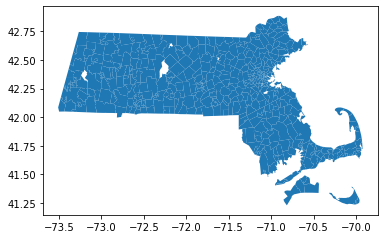

In [54]:
zcta.plot()


In [55]:
#reading in shapefiles. Should I be reading in and visualising all shapefiles here? yes Primary and supplemental?
hospitals = gpd.read_file(r"C:\Users\caree\uep239-finalproject\Data\tl_2010_25_zcta510\tl_2010_25_zcta510\tl_2010_25_zcta510.shp")

In [56]:
from scipy import ndimage

In [57]:
nearest_hospital = ndimage.distance_transform_edt(hospitals)

In [58]:
nearest_hospital

array([[71.34423593, 71.25307011, 71.1758386 , ..., 71.02816343,
        71.06335202, 71.11258679],
       [70.34912935, 70.25667228, 70.17834424, ..., 70.0285656 ,
        70.06425622, 70.11419257],
       [69.35416354, 69.26037828, 69.18092223, ..., 69.02897942,
        69.0651866 , 69.11584478],
       ...,
       [27.89265136, 27.65863337, 27.45906044, ..., 27.07397274,
        27.16615541, 27.29468813],
       [28.86173938, 28.63564213, 28.44292531, ..., 28.0713377 ,
        28.16025568, 28.28427125],
       [29.83286778, 29.61418579, 29.42787794, ..., 29.06888371,
        29.15475947, 29.27456234]])

In [61]:
type(nearest_hospital)

numpy.ndarray

In [65]:
#nearest_hospital.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
#Merge and then plot 
#how to merge numpy array with geopandas
#like this? https://www.w3schools.com/python/numpy/numpy_array_join.asp
zcta.merge(nearest_hospital,left_on='ZCTA5CE10', right_on='')

nearest_hospital.plot()

In [ ]:
#hospitals = hospitals.to_crs('epsg:4269') # Long Island State Plain

In [ ]:
#hospitals.crs

In [ ]:
#zcta.crs == hospitals.crs

In [ ]:
#no need to merge. Already at the level of zcta
#zcta_merge = zcta.merge(hospitals,left_on="ZCTA5CE10",right_on="ZCTA5CE10")
#zcta_merge.head()

In [ ]:
#for acs data, merge to zcta and then plot. have to do this in order to be able to plot

In [ ]:
#don't need this, right?
#boundaries = gpd.read_file(r"C:\Users\caree\uep239-finalproject\Data\MPO_Boundaries\MPO_Boundaries\MPO_Boundaries.shp")

In [ ]:
#type(boundaries)

In [75]:
zcta_fin = zcta.merge(financial,left_on='ZCTA5CE10', right_on='ZCTA')

In [77]:
#merged but not plotting
#zcta_fin.plot()

In [ ]:
zcta_age = zcta_fin.merge(age,left_on='ZCTA5CE10', right_on='ZCTA')

In [ ]:
zcta_age.plot()zcta_age = zcta_fin.merge(age,left_on='ZCTA5CE10', right_on='ZCTA')

In [ ]:
zcta_lim = zcta_age.merge(limited_eng,left_on='ZCTA5CE10', right_on='ZCTA')

In [ ]:
zcta_lim.plot()

In [ ]:
zcta_for = zcta_lim.merge(foreign,left_on='ZCTA5CE10', right_on='ZCTA')

In [ ]:
zcta_for.plot()

#Topic
3(2). Summarize the indicator values (like population density) for each ZCTA in the study area.

In [ ]:
#closest hospitals
#nh_min = nearest_hospital.min()
#not sure what to put in column spaces
nh_min = nearest_hospital[''].groupby(nearest_hospital['']).agg(['min'])

In [ ]:
#hospitals that are farthest away
#nh_max = nearest_hospital.max()
nh_max = nearest_hospital[''].groupby(nearest_hospital['']).agg(['max'])

In [ ]:
#mean distance
#nh_mean = nearest_hospital.mean()
nh_mean = nearest_hospital[''].groupby(nearest_hospital['']).agg(['min'])

In [ ]:
#highest number of seniors in a ZCTA
#should I be using merged or unmerged age?
#age_max = zcta_age['percent_seniors'].max()
age_max = zcta_age['percent_seniors'].groupby(zcta_age['ZCTA']).agg(['max'])

In [ ]:
#lowest numnber of seniors in a ZCTA
#age_min = zcta_age['percent_seniors'].min()
age_min = zcta_age['percent_seniors'].groupby(zcta_age['ZCTA']).agg(['min'])

In [ ]:
#average numnber of seniors in a ZCTA
#age_mean = zcta_age['percent_seniors'].mean()
age_mean = zcta_age['percent_seniors'].groupby(zcta_age['ZCTA']).agg(['mean'])

In [ ]:
#highest percentage of low-income in a ZCTA
#financial_max = zcta_fin['percent_low-income'].max()
financial_max = zcta_fin['percent_low-income'].groupby(zcta_fin['ZCTA']).agg(['max'])

In [ ]:
#lowest percentage of low-income in a ZCTA
#financial_min = zcta_fin['percent_low-income'].min()
financial_min = zcta_fin['percent_low-income'].groupby(zcta_fin['ZCTA']).agg(['min'])

In [ ]:
#highest percentage of low-income in a ZCTA
#financial_mean = zcta_fin['percent_low-income'].mean()
financial_mean = zcta_fin['percent_low-income'].groupby(zcta_fin['ZCTA']).agg(['mean'])

In [ ]:
#highest percentage of limited english speaking households in a ZCTA
#limited_max = zcta_lim['percent_limited'].max()
limited_max = zcta_lim['percent_limited'].groupby(zcta_lim['ZCTA']).agg(['max'])


In [ ]:
#lowest percentage of limited english speaking households in a ZCTA
#limited_min = zcta_lim['percent_limited'].min()
limited_min = zcta_lim['percent_limited'].groupby(zcta_lim['ZCTA']).agg(['min'])


In [ ]:
#average percentage of limited english speakers in a ZCTA
#limited_mean = zcta_lim['percent_limited'].mean()
limited_mean = zcta_lim['percent_limited'].groupby(zcta_lim['ZCTA']).agg(['mean'])


In [ ]:
#highest percentage of foreign born population in a ZCTA
#foreign_max = zcta_for['percent_foreign'].max()
foreign_max = zcta_for['percent_foreign'].groupby(zcta_for['ZCTA']).agg(['max'])


In [ ]:
#lowest percentage of foreign born population in a ZCTA
#foreign_min = zcta_for['percent_foreign'].min()
foreign_min = zcta_for['percent_foreign'].groupby(zcta_for['ZCTA']).agg(['min'])


In [ ]:
#mean percentage of foreign born population in a ZCTA
#foreign_mean = zcta_for['percent_foreign'].mean()
foreign_mean = zcta_for['percent_foreign'].groupby(zcta_for['ZCTA']).agg(['mean'])



3(3) Produce a choropleth map visualizing the indicator values and produce a ZCTA ranking based on the indicator values, reporting the highest and lowest ranking ZCTAs.

In [ ]:
zcta_for.crs == zcta.crs


In [ ]:
#sort the values based on ZCTA
zcta_sort = zcta_for.sort_values('ZCTA',ascending=False)
print(zcta_sort)

#shows the highest value
zcta_sort.head(1)

In [ ]:
import matplotlib.pyplot as plt
zcta_sort.plot(column='ZCTA',
           legend=True,
           cmap='OrRd',
           figsize=(15, 10),
           legend_kwds={'label': "Highest Ranking ZCTAs", 'orientation': "horizontal"})

#Topic
3(4) Convert the indicator values into a suitability or vulnerability index or score. This can be done in two ways:
Reclassify the indicator values based on classes of your choice into a five-point (or ten-point) score.

Normalize the indicator values into a suitability or vulnerability index ranging from zero to one.

In [ ]:
#normalising the data 
def normalization(df):
    df_scaled = df.copy()
    for column in df_scaled.columns:
        try:
            df_scaled[column] = df_scaled[column] / df_scaled[column].abs().max()
        except TypeError:
            return df_scaled

In [ ]:
age_norm = normalization(age)
age_norm

In [ ]:
foreign_norm = normalization(foreign)
foreign_norm

In [ ]:
limited_eng_norm = normalization(limited_eng)
limited_eng_norm

In [ ]:
financial = normalization(financial)
financial_norm

#Topic
4. Summarize the single indicator based scores or indices into an overall weighted or unweighted score or index. You should justify any chosen weights or the decision to forego weighting the indicators (assigning each indicator an equal weight). You are welcome to produce both a weighted and an unweighted overall index or score.

In [ ]:
#decided to do unweighted because more research needs to be done to fig
zcta_lim['unweighted_score'] = age_norm + foreign_norm + limited_eng_norm + financial_norm

In [ ]:
zcta_lim['unweighted_score']

In [ ]:
#should this be added to ZTCA to be able to sort? or is it okay because I added as a column?
#zcta_norm = zcta_lim.merge(unweighted_score,left_on='ZCTA5CE10', right_on='ZCTA')

#Topic
5. Visualize the overall suitability or vulnerability index or score on a choropleth map and produce a ZCTA ranking based on the score or index, reporting the highest and lowest ranking ZCTAs.

In [ ]:
norm_sort = zcta_lim.sort_values('unweighted_score',ascending=False)
print(zcta_norm)

In [ ]:
import matplotlib.pyplot as plt
zcta_sort.plot(column='unweighted_score',
           legend=True,
           cmap='OrRd',
           figsize=(15, 10),
           legend_kwds={'label': "Highest Ranking ZCTAs", 'orientation': "horizontal"})

In [ ]:
#what are the most and least vulnerable zip codes?